## Bildkategorisierung

Bilder in zwei Kategorien aufteilen, hierbei gibt es ein vorgegebenes Datenset, welches schon kategorisiert ist.

In [1]:
import numpy as np
import tensorflow as tf

In [3]:
data = tf.keras.utils.image_dataset_from_directory("Data\Images")

Found 167 files belonging to 2 classes.


BatchDataset: Datenset aufgeteilt in einzelne Batches (32 groß)

shape(Batchgröße, X, Y, Anz. Dimensionen -> X, Y, Farbe)

In [4]:
iterator = data.as_numpy_iterator()

In [6]:
batch = iterator.next()

In [13]:
batch

(array([[[[2.28609375e+02, 2.45609375e+02, 2.01609375e+02],
          [2.30084961e+02, 2.47084961e+02, 2.03084961e+02],
          [2.29453125e+02, 2.48453125e+02, 2.03453125e+02],
          ...,
          [1.40829102e+02, 2.22829102e+02, 1.74829102e+02],
          [1.40084961e+02, 2.23084961e+02, 1.77084961e+02],
          [1.39424805e+02, 2.22424805e+02, 1.76424805e+02]],
 
         [[2.33618164e+02, 2.49618164e+02, 2.03416992e+02],
          [2.32640625e+02, 2.48640625e+02, 2.03400391e+02],
          [2.31721680e+02, 2.48081055e+02, 2.02200195e+02],
          ...,
          [1.40687500e+02, 2.22687500e+02, 1.74687500e+02],
          [1.41000000e+02, 2.23000000e+02, 1.75000000e+02],
          [1.39000000e+02, 2.23000000e+02, 1.74000000e+02]],
 
         [[2.37937500e+02, 2.51920898e+02, 2.02970703e+02],
          [2.36734375e+02, 2.50518555e+02, 2.02166016e+02],
          [2.36504883e+02, 2.50421875e+02, 2.01670898e+02],
          ...,
          [1.41000000e+02, 2.23000000e+02, 1.7468

In [8]:
print(batch[0].shape)

(32, 256, 256, 3)


In [9]:
print(batch[1])

[0 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 0 1 1 0 1 1 1]


In [14]:
data = data.map(lambda x, y: (x / 255, y))  # Images herunterskalieren -> schnellere Ergebnis

In [12]:
data.as_numpy_iterator().next()

(array([[[[0.99725556, 0.7375577 , 0.78270227],
          [0.9885786 , 0.6611808 , 0.6953666 ],
          [0.9859375 , 0.5843507 , 0.55476147],
          ...,
          [0.9020995 , 0.6478742 , 0.38825408],
          [0.8772347 , 0.6146482 , 0.37928563],
          [0.8845294 , 0.6389565 , 0.39019248]],
 
         [[0.99043304, 0.7578935 , 0.8037215 ],
          [0.98664755, 0.68013173, 0.71388775],
          [0.9720087 , 0.5791165 , 0.6084887 ],
          ...,
          [0.954893  , 0.7050324 , 0.47559744],
          [0.90777564, 0.65329266, 0.43952745],
          [0.86856246, 0.6489574 , 0.41157347]],
 
         [[0.9974814 , 0.7340922 , 0.8060438 ],
          [0.99774814, 0.69494593, 0.7313456 ],
          [0.98193645, 0.54278564, 0.6181992 ],
          ...,
          [0.9107149 , 0.6602105 , 0.41071346],
          [0.8956326 , 0.64673555, 0.4004099 ],
          [0.852825  , 0.64388186, 0.3972254 ]],
 
         ...,
 
         [[0.64954007, 0.70489335, 0.84931487],
          [0.74529

## Datenset aufteilen

In [15]:
training_size = int(len(data) * 0.8)
validation_size = int(len(data) * 0.1)
test_size = int(len(data) * 0.1)

training = data.take(training_size)
validation = data.skip(training_size).take(validation_size)
test = data.skip(training_size + validation_size).take(test_size)

In [16]:
model = tf.keras.Sequential([
    # 16 Neuronen, (3, 3): 3x3 Maske, Scanner der das Image in einem 3x3 Bereich anschaut und nach markanten Merkmalen sucht, 1: Pixelbewegung
    tf.keras.layers.Conv2D(16, (3, 3), 1, activation="relu", input_shape=(256, 256, 3)),  # Conv2D: Spacial Layer, nimmt ein 2D Array statt 1D Array, hauptsächlich für Images
    tf.keras.layers.MaxPool2D(),  # Kondensationslayer: Verkleinert den Layer auf die relevanten Informationen
    tf.keras.layers.Conv2D(32, (3, 3), 1, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Conv2D(16, (3, 3), 1, activation="relu"),
    tf.keras.layers.MaxPool2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [17]:
model.compile(optimizer=tf.keras.optimizers.Adam(0.001), loss="binary_crossentropy", metrics=["accuracy"])

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [19]:
history = model.fit(training, epochs=20, validation_data=validation)

Epoch 1/20
4/4 [==============================] - 4s 414ms/step - loss: 0.6860 - accuracy: 0.5547
Epoch 2/20
4/4 [==============================] - 3s 412ms/step - loss: 0.6829 - accuracy: 0.6016
Epoch 3/20
4/4 [==============================] - 3s 421ms/step - loss: 0.6838 - accuracy: 0.5547
Epoch 4/20
4/4 [==============================] - 3s 443ms/step - loss: 0.6830 - accuracy: 0.6016
Epoch 5/20
4/4 [==============================] - 4s 686ms/step - loss: 0.6847 - accuracy: 0.5703
Epoch 6/20
4/4 [==============================] - 5s 702ms/step - loss: 0.6862 - accuracy: 0.5547
Epoch 7/20
4/4 [==============================] - 4s 664ms/step - loss: 0.6741 - accuracy: 0.5859
Epoch 8/20
4/4 [==============================] - 4s 610ms/step - loss: 0.6621 - accuracy: 0.6094
Epoch 9/20
4/4 [==============================] - 4s 619ms/step - loss: 0.6767 - accuracy: 0.5938
Epoch 10/20
4/4 [==============================] - 4s 581ms/step - loss: 0.6503 - accuracy: 0.6406
Epoch 11/20
4/4 [==

In [20]:
import matplotlib.pyplot as plt

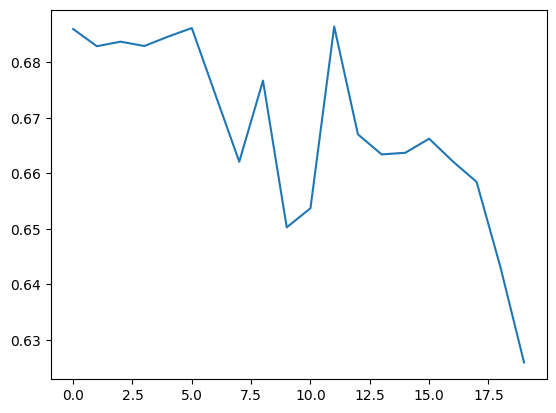

In [21]:
plt.plot(history.history["loss"])

In [22]:
import cv2

ModuleNotFoundError: No module named 'cv2'

In [ ]:
img = cv2.imread("Data\happy.jpg")
outcome = model.predict(img)  # Outcome: zwischen 0 und 1, >= 0.5, < 0.5